### load Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 🐍 Load data

In [14]:
# Load Kenya inflation data from 2010 to 2025
df = pd.read_csv('../data/world_bank_data_2025.csv', encoding="latin1")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

In [15]:
# print the first five rows in a data 
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [8]:
def wrangle_kenya_inflation(df):
    """
    Filters the dataset to retain only Kenya's inflation (CPI %) data.
    
    Parameters:
    df (pd.DataFrame): Original dataframe with global economic indicators.

    Returns:
    pd.DataFrame: Filtered dataframe with Kenya's inflation data.
    """
    # Filter for Kenya and select relevant columns
    kenya_df = df[df["country_name"] == "Kenya"][["year", "Inflation (CPI %)"]]
    
    # Optional: sort by year just in case
    kenya_df = kenya_df.sort_values("year").reset_index(drop=True)

    return kenya_df

In [16]:
kenya_df = wrangle_kenya_inflation(df)
kenya_df.head()

,year,Inflation (CPI %)
0,2010,3.961389
1,2011,14.022491
2,2012,9.377770
3,2013,5.717494
4,2014,6.878155


In [20]:
print(kenya_df.shape)

(16, 2)


In [24]:
df = pd.read_csv("../data/Inflation Rates.csv")
df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2025,June,3.56,3.82
1,2025,May,3.63,3.75
2,2025,April,3.74,4.11
3,2025,March,3.81,3.62
4,2025,February,3.98,3.45


### Preprocess data
**2.1 Combine Year & Month into datetime**

In [ ]:
# Create a single datetime column
df['date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))

# Sort
df = df.sort_values('date')

# Keep only necessary columns
df = df[['date', '12-Month Inflation']].rename(columns={'12-Month Inflation': 'inflation_rate'})

# Reset index
df = df.set_index('date')


print(df.isnull().sum())

inflation_rate    0
dtype: int64


C:\Users\STEVE\AppData\Local\Temp\ipykernel_11212\2693361427.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


In [26]:
df.head()

,inflation_rate
date,
2005-01-01,14.87
2005-02-01,13.94
2005-03-01,14.15
2005-04-01,16.02
2005-05-01,14.78


In [29]:
df.shape

(247, 1)

### 📊 EDA (exploratory data analysis)

In [33]:
import os
# Ensure the directory exists
plot_dir = "outputs/plots"
os.makedirs(plot_dir, exist_ok=True)

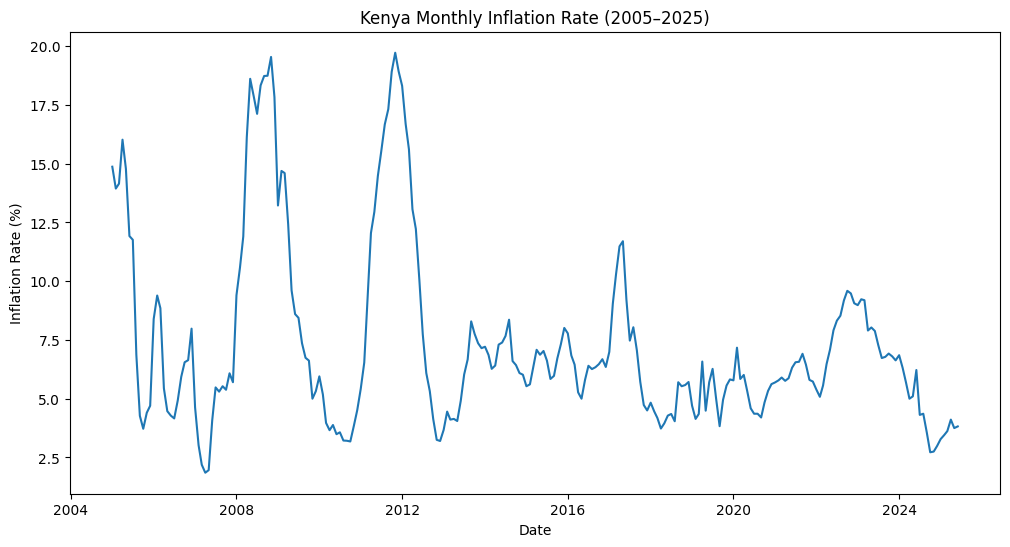

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df['inflation_rate'])
plt.title('Kenya Monthly Inflation Rate (2005–2025)')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')

# Save the figure
plot_path = os.path.join(plot_dir, "Kenya Monthly Inflation Rate (2005–2025).png")
plt.savefig(plot_path, dpi=300)

plt.show()

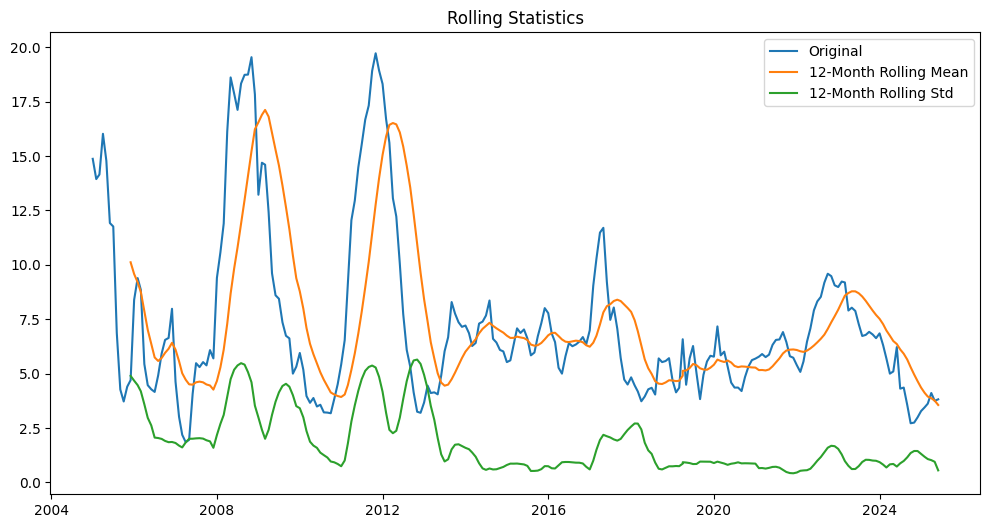

In [35]:
# Plot rolling mean & std
df['rolling_mean'] = df['inflation_rate'].rolling(window=12).mean()
df['rolling_std'] = df['inflation_rate'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['inflation_rate'], label='Original')
plt.plot(df.index, df['rolling_mean'], label='12-Month Rolling Mean')
plt.plot(df.index, df['rolling_std'], label='12-Month Rolling Std')
plt.legend()
plt.title('Rolling Statistics')

# Save the figure
plot_path = os.path.join(plot_dir, "Rolling Statistics.png")
plt.savefig(plot_path, dpi=300)

plt.show()

In [36]:
# Check stationarity with Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['inflation_rate'])
print(f'ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}')

ADF Statistic: -3.4814, p-value: 0.0085


### Modeling with ARIMA
**Train-test split**
- ***Use last 12–24 months as test***.

In [37]:
train = df[:'2023-12-01']
test = df['2024-01-01':]

**Identify order with auto_arima**

In [38]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train['inflation_rate'], seasonal=True, m=12, trace=True)
print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=625.172, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=726.829, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=633.142, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=621.745, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=725.042, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=694.640, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=620.968, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=635.455, Time=0.15 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=622.578, Time=0.64 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=622.639, Time=0.98 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=620.677, Time=0.55 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=643.700, Time=0.37 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=621.819, Time=0.82 sec
 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=621.868, Time=0.43 sec
 ARIMA(1,1,0)(0,0,2)[12] intercep

**Fit ARIMA & forecast**

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['inflation_rate'], order=(1,1,1), seasonal_order=(1,1,1,12)) # example order
model_fit = model.fit()

forecast_arima = model_fit.get_forecast(steps=len(test))
forecast_arima_mean = forecast_arima.predicted_mean
forecast_ci = forecast_arima.conf_int()


c:\Users\STEVE\OneDrive\Desktop\PYTHON\.venvBayes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\STEVE\OneDrive\Desktop\PYTHON\.venvBayes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\STEVE\OneDrive\Desktop\PYTHON\.venvBayes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\STEVE\OneDrive\Desktop\PYTHON\.venvBayes\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, callin

### 🔮 Modeling with Facebook Prophet

**Prepare data**

In [40]:
prophet_df = df.reset_index().rename(columns={'date':'ds', 'inflation_rate':'y'})

train_p = prophet_df[prophet_df['ds'] < '2024-01-01']
test_p = prophet_df[prophet_df['ds'] >= '2024-01-01']

**Fit & predict**

In [44]:
from prophet import Prophet

# Initialize the model with only yearly seasonality
model_p = Prophet(yearly_seasonality=True, weekly_seasonality=False)

# Optional: add monthly seasonality manually (if data were monthly and had enough history)
# model_p.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model_p.fit(train_p)

# Create future dataframe for the same length as the test set
future = model_p.make_future_dataframe(periods=len(test), freq='YS')  # 'YS' for Year Start frequency

# Generate forecast
forecast_p = model_p.predict(future)


17:12:07 - cmdstanpy - INFO - Chain [1] start processing
17:12:07 - cmdstanpy - INFO - Chain [1] done processing


### 📏 Evaluation

In [45]:
# ARIMA
mae_arima = mean_absolute_error(test['inflation_rate'], forecast_arima_mean)
rmse_arima = mean_squared_error(test['inflation_rate'], forecast_arima_mean, squared=False)

# Prophet
forecasted_prophet = forecast_p[-len(test):]['yhat'].values
mae_prophet = mean_absolute_error(test_p['y'], forecasted_prophet)
rmse_prophet = mean_squared_error(test_p['y'], forecasted_prophet, squared=False)

print(f'ARIMA → MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}')
print(f'Prophet → MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}')

ARIMA → MAE: 2.81, RMSE: 3.13
Prophet → MAE: 0.70, RMSE: 0.85


### 📈 Visualize forecast vs actuals

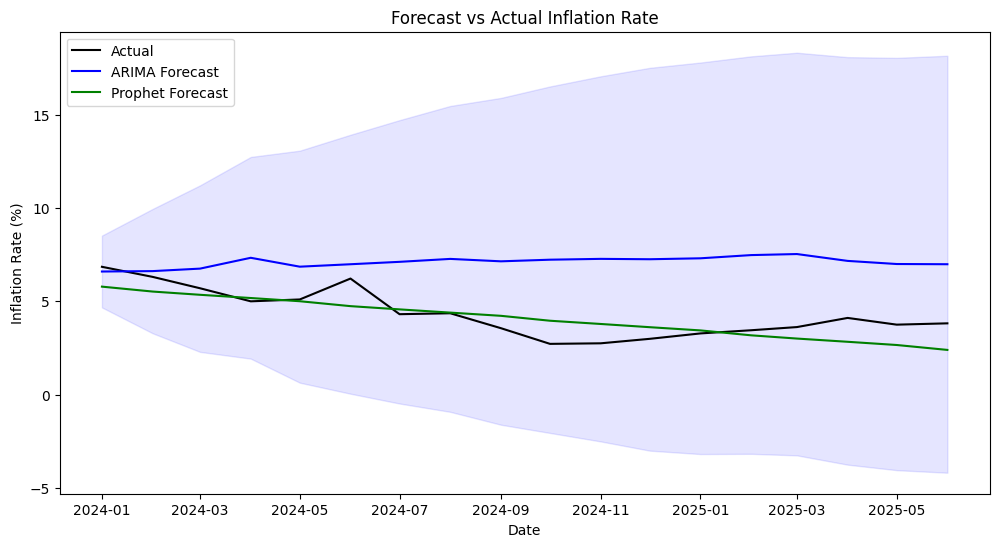

In [46]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['inflation_rate'], label='Actual', color='black')
plt.plot(test.index, forecast_arima_mean, label='ARIMA Forecast', color='blue')
plt.plot(test.index, forecasted_prophet, label='Prophet Forecast', color='green')
plt.fill_between(test.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='blue', alpha=0.1)
plt.title('Forecast vs Actual Inflation Rate')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.legend()

# Save the figure
plot_path = os.path.join(plot_dir, "Forecast vs Actual Inflation Rate.png")
plt.savefig(plot_path, dpi=300)

plt.show()
